Programming Fundamentals: Simple RNN with TensorFlow

# use this codes in terminal/cmd after installing anaconda

conda create -n ml_env python

conda activate ml_env

pip install torch torchvision torchaudio

pip install tensorflow

pip install pandas scikit-learn matplotlib seaborn jupyterlab

pip install d2l==1.0.3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# explanation of the code
# This code is a simple RNN model for sentiment analysis using the IMDB dataset.    
# It loads the dataset, preprocesses the data, defines a model, compiles it, trains it, and evaluates it.
# Load the IMDB dataset


/Volumes/Samsung_T7_SSD/Anaconda/conda_envs/ml_env/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Volumes/Samsung_T7_SSD/Anaconda/conda_envs/ml_env/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Volumes/Samsung_T7_SSD/Anaconda/conda_envs/ml_env/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at te

In [ ]:
# 1. Hyperparameters and Data Loading
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# explanation of the code
# The IMDB dataset is loaded with a maximum of 10,000 words.
# The training data consists of 25,000 samples, each with a maximum length of 500 words.
# The labels are binary, indicating positive or negative sentiment. 

# individual components of the data loading
# imdb.load_data: This function loads the IMDB dataset, returning training and test data.
# x_train and x_test: These are the input sequences (reviews) represented as lists of word indices.
# y_train and y_test: These are the labels (sentiments) corresponding to the reviews, where 1 indicates positive sentiment and 0 indicates negative sentiment.

# max_features: This parameter limits the dataset to the top 10,000 most frequent words.
# maxlen: This parameter sets the maximum length of each review to 500 words, truncating longer reviews and padding shorter ones.

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# 2. Data Preprocessing
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# explanation of the code
# The sequences are padded to ensure that all input sequences have the same length of 500 words.

# individual components of the preprocessing
# pad_sequences: This function pads the sequences to a specified length (maxlen) with zeros
# to ensure uniform input size for the RNN model.

In [ ]:
# How the imdb dataset looks like
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

# explaining the shapes
# The training data shape is (25000, 500) indicating 25000 samples each with 500 words.
# The labels shape is (25000,) indicating 25000 binary labels
# The test data shape is (25000, 500) indicating 25000 samples each with 500 words.
# The labels shape is (25000,) indicating 25000 binary labels


Training data shape: (25000, 500), Labels shape: (25000,)
Test data shape: (25000, 500), Labels shape: (25000,)


In [ ]:
# Show a few samples from the training data
for i in range(5):
    print(f"Sample {i+1}: {x_train[i]}, Label: {y_train[i]}")

# Show a few samples from the test data
for i in range(5):
    print(f"Test Sample {i+1}: {x_test[i]}, Label: {y_test[i]}")

# Show the first 100 words of the first training sample
print(f"First training sample (first 100 words): {x_train[0][:100]}")

# Show the first 100 words of the first test sample
print(f"First test sample (first 100 words): {x_test[0][:100]}")

# explanation of the output
# The training and test data shapes indicate the number of samples and the length of each sequence.
# The samples printed show the integer-encoded words of the reviews, and the labels indicate sentiment
# (0 for negative, 1 for positive). 

Sample 1: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  

Model Bases Tasks

In [ ]:
# 3. Model Definition
model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

# explanation of the code
# The model consists of an embedding layer to convert word indices into dense vectors,
# followed by a SimpleRNN layer with 32 units, and a Dense output layer with a sigmoid activation function for binary classification.
# individual components of the model
# Embedding layer: Converts word indices into dense vectors of size 32.
# SimpleRNN layer: Processes the sequence data with 32 units.
# Dense layer: Outputs a single value between 0 and 1, indicating the sentiment of the review. Dense(1, activation='sigmoid') is used for binary classification.
# activation='sigmoid': This activation function is used for binary classification, outputting a probability score.

In [ ]:
# 4. Model Compilation
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# explanation of the code
# The model is compiled with the RMSprop optimizer, binary crossentropy loss function, and accuracy as a metric.
# individual components of the compilation
# optimizer='rmsprop': This is an adaptive learning rate optimization algorithm.
# loss='binary_crossentropy': This loss function is suitable for binary classification tasks.
# metrics=['acc']: This metric tracks the accuracy of the model during training and evaluation. 

In [ ]:
# 5. Model Training
model.fit(x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# explanation of the code
# The model is trained for 10 epochs with a batch size of 128, using 20% of the training data for validation.
# The training process adjusts the model weights to minimize the loss function and improve accuracy.

# epochs: The number of times the model will see the entire training dataset.
# batch_size: The number of samples processed before the model's internal parameters are updated.
# validation_split: The fraction of the training data to be used as validation data.

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - acc: 0.6769 - loss: 0.5847 - val_acc: 0.5402 - val_loss: 1.0099
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - acc: 0.8236 - loss: 0.4093 - val_acc: 0.6834 - val_loss: 0.6254
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - acc: 0.8676 - loss: 0.3261 - val_acc: 0.7776 - val_loss: 0.4826
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - acc: 0.8874 - loss: 0.2780 - val_acc: 0.8064 - val_loss: 0.4255
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - acc: 0.9025 - loss: 0.2545 - val_acc: 0.8320 - val_loss: 0.4268
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - acc: 0.9290 - loss: 0.1944 - val_acc: 0.8576 - val_loss: 0.3635
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - acc: 0.9507 - loss: 0.1422 - val_acc: 0.8178 - val_loss: 0.4712
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - acc: 0.9653 - loss: 0.1045 - val_acc: 0.7996 - val_loss: 0.5166
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/

In [ ]:
# 6. Model Evaluation
results = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

# explanation of the code
# The model is evaluated on the test data, and the loss and accuracy are printed.
# The evaluation provides an estimate of how well the model generalizes to unseen data.
#  Performance figure of 0.5 or above indicates a good model.


Test Loss: 0.5181217789649963, Test Accuracy: 0.8496000170707703


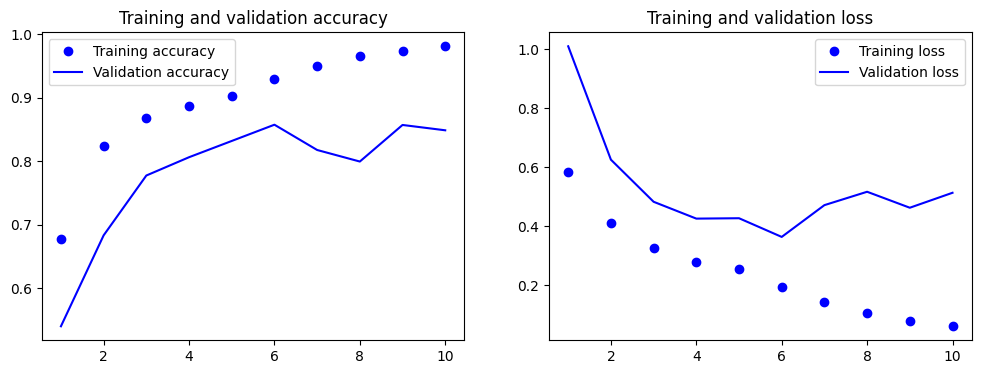

In [ ]:
# visualisation and Testing
import matplotlib.pyplot as plt
import numpy as np
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
plot_history(model.history)

# explanation of the code
# The plot_history function visualizes the training and validation accuracy and loss over epochs.
# It helps to understand how well the model is learning and whether it is overfitting or underfitting.
# The blue lines represent the training metrics, while the orange lines represent the validation metrics.
# The x-axis represents the epochs, and the y-axis represents the accuracy and loss values
# The plots can help identify if the model is overfitting (validation loss increases while training loss decreases) or if it is learning well (both training and validation metrics improve).
# The function takes the history object returned by model.fit() and extracts the accuracy and loss values for both training and validation sets.
# It then plots these values against the number of epochs to visualize the model's performance 
# on the training and validation datasets.  

# ideal graphs would show both training and validation accuracy increasing over epochs,
# while training and validation loss should decrease. If the validation loss starts to increase while training loss
# continues to decrease, it indicates overfitting, meaning the model is learning the training data
# too well but not generalizing to unseen data.


In [ ]:
#testing the model with a sample input
sample_input = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
sample_input = pad_sequences(sample_input, maxlen=maxlen)
sample_prediction = model.predict(sample_input)
print(f"Sample Prediction: {sample_prediction[0][0]}")

# explanation of the code
# The model is tested with a sample input, which is padded to match the expected input shape
# The model predicts the sentiment of the sample input, and the prediction is printed.
# The prediction output is a probability score between 0 and 1, indicating the sentiment of the input review.
# A score closer to 1 indicates a positive sentiment, while a score closer to 0 indicates a negative sentiment.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Sample Prediction: 0.10285074263811111


In [ ]:
# 7. Save the Model
model.save('rnn_model.h5')
# Note: TensorFlow models are typically saved in .h5 format, not .pt.

# explanation of the code
# The model is saved to a file named 'rnn_model.h5'.
# This allows for later loading and use without needing to retrain the model.
# Saving the model preserves its architecture, weights, and training configuration.
# This is useful for deploying the model in production or for further experimentation without retraining.
# The saved model can be loaded later using tf.keras.models.load_model('rnn_model.h5').
# This allows for easy reuse of the trained model without needing to retrain it, saving time and computational resources.
# The .h5 format is a standard format for saving Keras models, which includes the model architecture, weights, and training configuration.
# This makes it easy to share the model with others or deploy it in different environments.